In [1]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [6]:
# Step 2: Load Dataset
df = pd.read_csv("Email_Spam_Data.csv")
df = df.dropna(subset=["Is_Spam"])      
df["Is_Spam"] = df["Is_Spam"].astype(int)

print(df.head())


   Email_ID  Word_Freq_Money  Word_Freq_Offer  Word_Freq_Free  Char_Length  \
0         1             0.05             0.02            0.00        250.0   
1         2             0.10             0.08            0.02        300.0   
2         3             0.00             0.01            0.00        180.0   
3         4             0.12             0.10            0.05        320.0   
4         5             0.02             0.01            0.00        210.0   

   Num_Links  Is_Spam  
0        0.0        0  
1        1.0        1  
2        0.0        0  
3        2.0        1  
4        0.0        0  


In [7]:
# Step 3: Data Preprocessing
df = df.drop("Email_ID", axis=1)  # Remove ID column

# Split features and target
X = df.drop("Is_Spam", axis=1)
y = df["Is_Spam"]

In [8]:
# Step 4: Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [10]:
# Step 5: Train Naive Bayes Model
nb = GaussianNB()
nb.fit(X_train, y_train)

# Step 6: Evaluate Model
y_pred = nb.predict(X_test)

print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         6

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10

Accuracy: 1.0


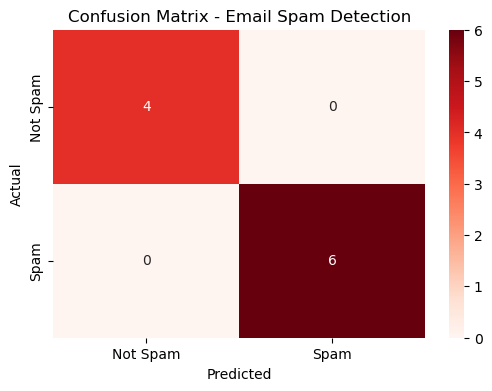

In [11]:
# Step 7: Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds", xticklabels=["Not Spam", "Spam"], yticklabels=["Not Spam", "Spam"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Email Spam Detection")
plt.show()

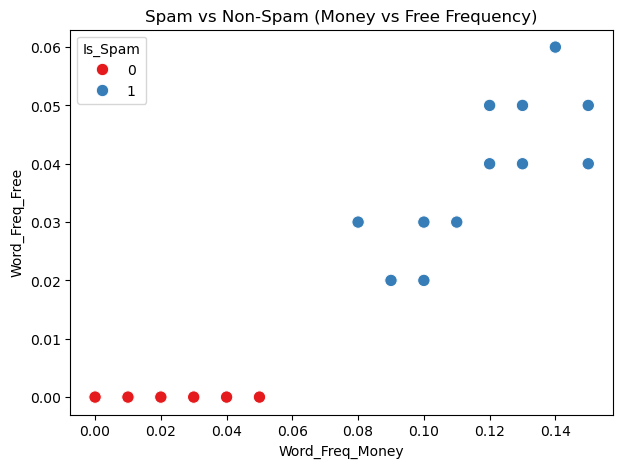

In [12]:
# Step 8: Visualization of Features
plt.figure(figsize=(7,5))
sns.scatterplot(x=df["Word_Freq_Money"], y=df["Word_Freq_Free"], hue=df["Is_Spam"], palette="Set1", s=80)
plt.title("Spam vs Non-Spam (Money vs Free Frequency)")
plt.show()